Certains points abordés ici serviront très peu ou seront abordés pendant l'année. Il s'agit d'approfondissement pour ceux qui ont déjà bien compris les parties précédentes.

In [1]:
"""On importe les bibliothèques scientifiques car elles seront utilisées ensuite"""
import numpy as np
import matplotlib.pyplot as plt


```{tip}
L'ordre des parties va du plus important au moins important.

```

# Fenêtre multi-graphique
Comme expliqué précédemment, on peut créer une fenêtre graphique avec plusieurs tracés (plusieurs axes). Nous vous expliquons comment faire.

## Création de la grille.

```{code-block}
import matplotlib.pyplot as plt
f, ax = plt.subplots(nlignes, ncolonnes)  # nlignes et ncolonnes sont des entiers
```

* `f` toujours la fenêtre graphique
* `ax` est alors un vecteur (si nlignes OU ncolonnes vaut 1) ou un tableau (sinon) qui contient toutes les zones de tracé.

On accède alors à la zone de tracé voulue grâce à 
* `ax[i]` si c'est un vecteur où i est les indices de la ligne ou de la colonne souhaitée.
* `ax[i, j]` si c'est un tableau où i et j sont les indices respectifs de la ligne et de la colonne souhaités.

```{attention}
Comme pour les listes et les vecteurs numpy, __les indices commencent à 0__. Observez l'exemple ci-dessous pour voir les indices des zones de tracés.
```

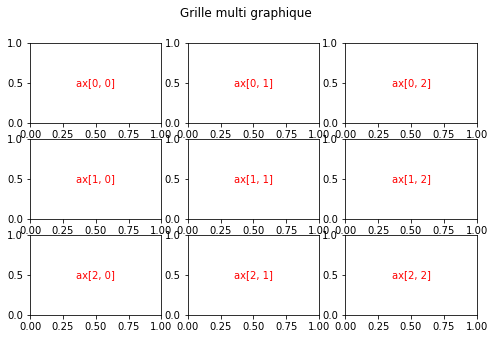

In [2]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(3, 3, figsize=(8, 5))

f.suptitle("Grille multi graphique")

for i in range(3):
    for j in range(3):
         ax[i, j].text(0.5, 0.5, 'ax[{}, {}]'.format(i, j), horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes, color='red')
plt.show()

## Création d'un tracé
La création d'un tracé (`hist`, `plot`, `errorbar`) se fait de la même manière précédemment mais un axe est appelé par la syntaxe `ax[i, j]` ou `ax[i]`. Ci-dessous deux exemples :
* Le premier avec une seule ligne : `ax` est un vecteur, on utilise `ax[i]`
* Le second avec deux lignes et deux colonnes : `ax` est un tableau, on utilise `ax[i, j]`

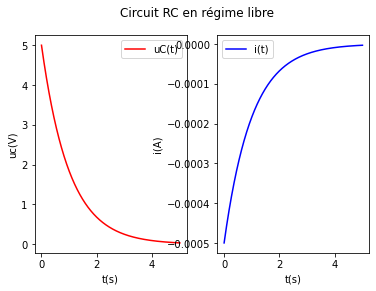

In [3]:
"""Exemple de tracé : sur une seule ligne.
On trace l'évolution temporelle de la tension aux bornes d'un condensateur et de l'intensité qui le traverse dans deux axes différents.
"""

import matplotlib.pyplot as plt
import numpy as np


tau = 1  # Constante de temps
U0 = 5  # Tension initiale
C = 1e-4  # Condensateur

t = np.linspace(0, 5 * tau, 1000)  # On trace 1000 points sur 5 tau.
uc = U0 * np.exp(-t / tau)  # Tension uC
i = - C / tau * U0 * np.exp(-t / tau)  # Intensité

f, ax = plt.subplots(1, 2)  # 1 ligne et 2 colonnes : ax est un vecteur

f.suptitle("Circuit RC en régime libre")
""" Tracé du premier graphique"""
ax[0].set_xlabel("t(s)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit
ax[0].set_ylabel("uc(V)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit

ax[0].plot(t, uc, label='uC(t)', color='red')
ax[0].legend()

""" Tracé du second graphique"""
ax[1].set_xlabel("t(s)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit
ax[1].set_ylabel("i(A)")  # Une seule ligne : ax donc un vecteur. Un seul indice suffit

ax[1].plot(t, i, label='i(t)', color='blue')

ax[1].legend()


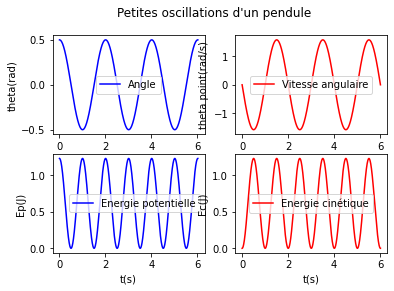

In [4]:
"""Exemple de tracé : un tableau 2*2
On trace l'évolution temporelle de l'angle, de la vitesse angulaire, de l'énergie potentielle et cinétique d'une pendule simple aux petites oscillations
"""
l = 1  # Longueur du pendule (m)
g = 9.81  # Champ de pesanteur (m/s^2)
m = 1  # Masse(kg)
w0 = np.sqrt(g / l)  # Pulsation propre (rad/s)
theta0 = 0.5  # Amplitude des oscillations (rad)

N = 1000
t = np.linspace(0, 3 * 2 * np.pi / w0, N)
theta = theta0 * np.cos(w0 * t)  # Angle
thetapoint = -w0 * theta0 * np.sin(w0 * t)  # Vitesse angulaire
Ep = 1 / 2 * m * g *l * theta ** 2  # Energie potentielle dans l'approximation des petites angles
Ec = 1 / 2 * m * l ** 2 * thetapoint ** 2  # Energie cinétique


"""Création du graphique
"""
f, ax = plt.subplots(2, 2)  # ax est un tableau
f.suptitle("Petites oscillations d'un pendule")

"""Tracé de l'angle : en haut à gauche"""
ax[0, 0].set_xlabel("t(s)")
ax[0, 0].set_ylabel("theta(rad)")
ax[0, 0].plot(t, theta, label="Angle", color="blue")
ax[0, 0].legend()

"""Tracé de la vitesse angulaire : en haut à droite"""
ax[0, 1].set_xlabel("t(s)")
ax[0, 1].set_ylabel("theta point(rad/s)")
ax[0, 1].plot(t, thetapoint, label="Vitesse angulaire", color="red")
ax[0, 1].legend()

"""Tracé de l'énergie potentielle : en base à gauche"""
ax[1, 0].set_xlabel("t(s)")
ax[1, 0].set_ylabel("Ep(J)")
ax[1, 0].plot(t, Ep, label="Energie potentielle", color="blue")
ax[1, 0].legend()

"""Tracé de l'énergie cinétique : en haut à droite"""
ax[1, 1].set_xlabel("t(s)")
ax[1, 1].set_ylabel("Ec(J)")
ax[1, 1].plot(t, Ec, label="Energie cinétique", color="red")
ax[1, 1].legend()

plt.show()

## Améliorer l'apparence du graphique
On remarque que l'introduction des légendes des axes ou la position de la légende laisse à désirer. Si vous souhaitez obtenir un graphique plus propre voici deux modifications utiles :
* transformer la légende en titre de chaque zone (`ax[i, j].set_title("Titre")`)
* Ajouter __juste avant d'afficher le graphique__ `f.tight_layout()` : matplotlib va alors calculer tout seule les marges à mettre entre les graphiques en tenant compte des légendes et titres (_c'est pourquoi il faut le mettre à la fin puisqu'au début... il n'y a pas de légende !_)

Ci-après le code modifié.

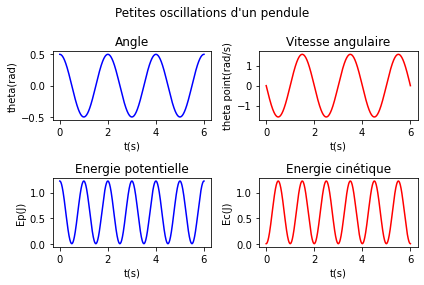

In [5]:
f, ax = plt.subplots(2, 2)  # ax est un tableau
f.suptitle("Petites oscillations d'un pendule")

"""Tracé de l'angle : en haut à gauche"""
ax[0, 0].set_xlabel("t(s)")
ax[0, 0].set_ylabel("theta(rad)")
ax[0, 0].plot(t, theta, label="Angle", color="blue")
ax[0, 0].set_title("Angle")

"""Tracé de la vitesse angulaire : en haut à droite"""
ax[0, 1].set_xlabel("t(s)")
ax[0, 1].set_ylabel("theta point(rad/s)")
ax[0, 1].plot(t, thetapoint, label="Vitesse angulaire", color="red")
ax[0, 1].set_title("Vitesse angulaire")

"""Tracé de l'énergie potentielle : en bas à gauche"""
ax[1, 0].set_xlabel("t(s)")
ax[1, 0].set_ylabel("Ep(J)")
ax[1, 0].plot(t, Ep, label="Energie potentielle", color="blue")
ax[1, 0].set_title("Energie potentielle")

"""Tracé de l'énergie cinétique : en haut à droite"""
ax[1, 1].set_xlabel("t(s)")
ax[1, 1].set_ylabel("Ec(J)")
ax[1, 1].plot(t, Ec, label="Energie cinétique", color="red")
ax[1, 1].set_title("Energie cinétique")

f.tight_layout()
plt.show()


```{tip}
Il existe des options intéressantes dans la fonction subplots. Sans rentrer dans les détails, citons `sharex` et `sharey` qui permet aux graphiques de partager la même échelle pour les abscisses ou les ordonnées (soit pour tous les graphiques de la fenêtre, soit par ligne/colonne).

Pour plus d'information, vous pouvez consulter [la page sur la fonction subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots)

```


(tableau_numpy)=
# Tableaux numpy : manipulations

## Opérations usuelles et concaténation
* Les opérations usuelles et fonctions mathématiques présentées précédemment s'appliquent à nouveau pour les tableaux numpy.
* Concaténation : La fonction `append` doit prendre un troisième argument si on concatène deux tableaux (ou un tableau et un vecteur). L'argument `axis = `:
    * `axis = 0` : Concaténer _verticalement_ : les deux tableaux doivent donc avec le même nombre de colonnes. Sinon Python renverra une erreur.
    * `axis = 1` : Concaténer _horizontalement_ : les deux tableaux doivent donc avec le même nombre de lignes. Sinon Python renverra une erreur.
    * Pas de `axis` : Python va transformer les tableaux en vecteurs et concaténer les vecteurs.

In [6]:
L1 = np.array([[2.3, 2.5], [3.14, 3.16], [3.14, 4.17]])
L2 = np.array([[1.2, 3.7], [4.2, 3.1]])

L3 = np.append(L1, L2)  # On aplatit les tableaux pour obtenir un vecteur.
print(L3)

L4 = np.append(L1, L2, axis=0)  # On place L2 sous L1
print(L4)

L5 = np.append(L1, L2, axis=1)  # Renvoie un erreur car on ne peut placer L2 à droite de L1 : pas le même nombre de lignes
print(L5)

[2.3  2.5  3.14 3.16 3.14 4.17 1.2  3.7  4.2  3.1 ]
[[2.3  2.5 ]
 [3.14 3.16]
 [3.14 4.17]
 [1.2  3.7 ]
 [4.2  3.1 ]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 2

## Sélection d'une partie d'un tableau.
```{attention}
* La méthode présentée ne fonctionne pas avec une liste de listes classique. Uniquement avec des tableaux `numpy`
* Attention, l'__indexation commence toujours à 0__
```

### Sélection d'un élément.

In [7]:
L1 = np.array([[2.3, 2.5], [3.14, 3.16], [3.14, 4.17]])
print(L1[2, 1])
"""
2 : sélection de la troisième ligne
1 : sélection de la deuxième colonne

On affiche donc 4.17
"""

4.17


'\n2 : sélection de la troisième ligne\n1 : sélection de la deuxième colonne\n\nOn affiche donc 4.17\n'

### Sélection d'une portion d'un tableau
```{margin}
On rappelle que L1[1:3] sélectionne jusqu'à l'index 3 (quatrième élément ) __non inclus__.
```

In [8]:
L1 = np.array([[2.3, 2.5, 6.8], [3.14, 3.16, -1.3], [3.14, 4.17, 3.45], [1.6, 4.2,  -8.2]])
print("Première sélection", L1[0:2, 1:3])  # Sélection des deux premières lignes (0 et 1) et colonnes d'index (1 et 2). C'est un tableau.
print("Deuxième sélection", L1[:, 1])  # Permet de sélectionner la deuxième colonne en entier (c'est un vecteur)
print("Troisième sélection", L1[1, :])  # Permet de sélectionner la deuxième ligne en entier (c'est un vecteur)
print("Quatrième sélection", L1[1])  # Permet de sélectionner la deuxième ligne en entier aussi (c'est un vecteur)
print("Cinquième sélection", L1[-1, :])  # Permet de sélectionner la dernière ligne en entier (c'est un vecteur)

Première sélection [[ 2.5   6.8 ]
 [ 3.16 -1.3 ]]
Deuxième sélection [2.5  3.16 4.17 4.2 ]
Troisième sélection [ 3.14  3.16 -1.3 ]
Quatrième sélection [ 3.14  3.16 -1.3 ]
Cinquième sélection [ 1.6  4.2 -8.2]


Voici le tableau `L1` avec les indices des lignes et colonnes pour mieux comprendre.

![Tableau numpy 2](./images/tableau_2.png)

## Si j'ai bien compris...
```{admonition} Exercice
:class: tip
Essayer de prévoir ce qu'affichera chaque `print` puis observer le résultat en cliquant sur la croix en bas à droite.
```

In [9]:
L1 = np.arange(0, 4)
L2 = L1 * L1
L3 = np.ones(4)

"""
Ci-dessous : une méthode pour créer un tableau à partir de 3 vecteurs de même taille.
Les L1, L2, L3 sont les lignes du tableau.
"""
M1 = np.array([L1, L2, L3])

print("Cas 1 :", M1)
print("Cas 2 :", M1[2, 3])
print("Cas 3 :", M1[-1, 2])
print("Cas 4 :", M1[1])
print("Cas 5 :", M1[2, :])
print("Cas 6 :", M1[:, -1])
print("Cas 7 :", M1[:, -2])
print("Cas 8 :", M1[1:2, 0:1])
print("Cas 9 :", M1[:-1, 1])  # Un peu plus compliqué...
print("Cas 10 :", M1[-3:-1, -3:3])  # On se concentre bien...

Cas 1 : [[0. 1. 2. 3.]
 [0. 1. 4. 9.]
 [1. 1. 1. 1.]]
Cas 2 : 1.0
Cas 3 : 1.0
Cas 4 : [0. 1. 4. 9.]
Cas 5 : [1. 1. 1. 1.]
Cas 6 : [3. 9. 1.]
Cas 7 : [2. 4. 1.]
Cas 8 : [[0.]]
Cas 9 : [1. 1.]
Cas 10 : [[1. 2.]
 [1. 4.]]


In [10]:
from myst_nb import glue

L1 = np.arange(0, 4)
L2 = L1 * L1
L3 = np.ones(4)

"""
Ci-dessous : une méthode pour créer un tableau à partir de 3 vecteurs de même taille.
Les L1, L2, L3 sont les lignes du tableau.
"""
M1 = np.array([L1, L2, L3])

glue("cas_1", M1)
glue("cas_2", M1[2, 3])
glue("cas_3", M1[-1, 2])
glue("cas_4", M1[1])
glue("cas_5", M1[2, :])
glue("cas_6", M1[:, -1])
glue("cas_7", M1[:, -2])
glue("cas_8", M1[1:2, 0:1])
glue("cas_9", M1[:-1, 1])  # Un peu plus compliqué...
glue("cas_10", M1[-3:-1, -3:3])  # On se concentre bien...

array([[0., 1., 2., 3.],
       [0., 1., 4., 9.],
       [1., 1., 1., 1.]])

1.0

1.0

array([0., 1., 4., 9.])

array([1., 1., 1., 1.])

array([3., 9., 1.])

array([2., 4., 1.])

array([[0.]])

array([1., 1.])

array([[1., 2.],
       [1., 4.]])

```{dropdown} Explication des réponses
__Les vecteurs__ :
* L1 crée une liste d'entier partant de 0 jusqu'à 4 __exclus__ soit `[0, 1, 2, 3]`
* L2 est la multiplication terme à terme L1 par lui-même, on passe chaque élément au carré soit `[0, 1, 4, 9]`
* L3 est une liste de 4 éléments composées uniquement de 1.

__Le tableau__ :
* M est le tableau composé des trois vecteurs. Il est donc de taille 3*4 (3 lignes, 4 colonnes). Soit :

![Tableau numpy](./images/matrice_numpy.png)

__Les affichage__:
* Cas 1 : Affichage du tableau complet
* Cas 2 : Affichage de l'élément de la troisième ligne (indice 2), quatrième colonne (indice 3), soit {glue:}`cas_2`
* Cas 3 : Afficahge de l'élément de la dernière ligne (indice -1), troisième colonne (indice 2) soit {glue:}`cas_3`
* Cas 4 : Affichage de la __deuxième ligne (indice 1)__ soit {glue:}`cas_4`
* Cas 5 : Affichage de la troisième ligne (indice 2) soit {glue:}`cas_5`
* Cas 6 : Affichage de la dernière colonne (indice -1) soit {glue:}`cas_6`
* Cas 7 : Affichage de l'avant-dernière colonne (indice -2) soit {glue:}`cas_7`
* Cas 8 : Affichage du tableau limité à la deuxième ligne (de l'indice 1 à l'indice 2 __exclus__) et à la première colonne soit {glue:}`cas_8` (de l'indice 0 à l'indice 1 __exclus__). _C'est bien un tableau mais avec une seule valeur !_
* Cas 9 : Affichage de la deuxième colonne mais sans la dernière ligne (on va jusqu'au -1 __exclus__) {glue:}`cas_9`
* Cas 10 : Affichage du tableau limité aux deux premières lignes (de l'indice -3 soit indice 0 - puisqu'il y a 3 lignes - jusqu'à l'indice -1 (dernier) __exclus__) et à la deuxième et troisième colonne (de l'indice - 3 soit la colonne d'indice 1 - puisque qu'il y a 4 colonnes - jusqu'à l'indice 3 soit la dernière colonne __exclus__) soit {glue:}`cas_10`
```

# La compréhension des listes

## Position du problème
On a vu que les listes classiques ne permettaient pas d'appliquer une fonction `f` à chaque élément en écrivant `f(L)` (`L` étant une liste classique). Cela a motivé l'utilisation des listes numpy. Néanmoins :
* On est quelques fois obligé d'utiliser les listes classiques
* La syntaxe `f(L)` ne fonctionne que si `f` est _vectorialisable_, c'est-à-dire programmée pour pouvoir s'appliquer à chaque élément.

```{admonition} Fonctions et opérateurs vectorialisables
:class: tip
Non exhaustif :
* Les opérateurs classiues `+,-,/,*` sont vectorialisables
* Les fonctions de la bibliothèques numpy (sin, cos, exp...) sont vectorialisables.
```

Un exemple fréquent est quand la fonction `f` fait appelle à un structure conditionnelle qui n'est pas vectorialisable. On reprend la fonction définie par morceau :

In [11]:
def fonction_morceau(x):
  if x < 3:  # Si x < 3
    a = x - 4
  elif x < 5:  # Si 3 <= x < 5
    a = x ** 2
  else:  # Si x >=5
    b = x + 4
    a = b ** 3
  return a

Impossible de l'appliquer directement à un vecteur numpy (pour la tracer par exemple:

In [12]:
x = np.linspace(0, 15, 1000)  # Vecteur de 1000 valeurs entre 0 et 15
y = fonction_morceau(x)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

`The truth value of an array with more than one element is ambiguous.` : Le message est clair : il cherche à travailler sur le vecteur et non sur chaque élément.

## Première solution
On peut écrire une boucle classique qui parcout tous les éléments de `x` et leur applique `fonction_morceau` :

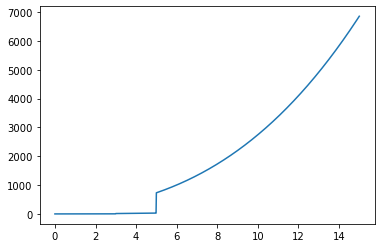

In [13]:
x = np.linspace(0, 15, 1000)
y = np.zeros(len(x))  # On crée un vecteur nul qu'on va remplir

for i in range(len(x)):  # i prendra les indices de 0 à len(x) - 1
  y[i] = fonction_morceau(x[i])  # On remplit l'élément d'indice i


"""On peut même le tracer"""
f, ax = plt.subplots()  # On ne va pas légender le graphique puisqu'il n'y a pas de contexte ici.
ax.plot(x, y)

plt.show()


## Utilisation de la compréhension des listes.
Une __liste en compréhension__ est une liste qui est obtenue par action (et/ou filtrage) de chaque élément d'une autre liste. La syntaxe est simple :

```python
L1 = [fonction(x) for x in L]  # L est une liste et L1 la nouvelle liste en compréhension
```

La syntaxe est assez clair : "Applique la `fonction` à `x` pour `x` qui parcourt chaque élément de `L`"

```{margin}
Ca fonction si `L` est un vecteur `numpy`

```

````{attention}
Cette méthode renvoie une liste __classique__, pas un vecteur `numpy`. Si vous voulez obtenir un vecteur numpy, il faudra utiliser la fonction `array` :
```python
L1 = np.array([fonction(x) for x in L])
```
````

A titre d'exemple :

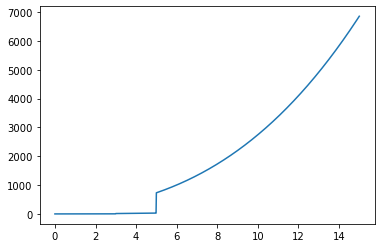

In [14]:
x = np.linspace(0, 15, 1000)
y = np.array([fonction_morceau(i) for i in x])


"""On peut même le tracer"""
f, ax = plt.subplots()  # On ne va pas légender le graphique puisqu'il n'y a pas de contexte ici.
ax.plot(x, y)

plt.show()


```{margin}
On peut aussi filtrer la liste pour n'appliquer `fonction(x)` que sous certaines conditions :

`[fonction(x) for x in L if x > 1]`

```

# Fonctions et méthodes
Vous avez peut-être remarqué que la façon d'appeler les "fonctions" pouvait un peu différer suivant les cas :
* `print(f)` : La __fonction__ `print` agit sur _l'argument_ `f` en l'affichant.
* `f.suptitle()` : la __méthode__  `suptitle` agit sur _l'objet_ `f` en le modifiant

On ne revient pas sur les fonctions qui ont déjà été présentées précédemment.

Les __méthodes__ sont comme des fonctions mais qui sont étroitement associées à certains types de variables (on parle d'objets). Cette notion est reliée à la __Programmation Orientée Objet__ (POO) rendue possibles par de nombreux langages informatiques (comme Python). 

Sans rentrer dans les détails, on peut en POO définir des _objets_ qui vont posséder certaines caractéristiques (des _attributs_) et certaines fonctions propres (des _méthodes_) qui permettent de les modifier ou d'obtenir certaines caractéristiques.

Par exemple, si je crée un vecteur numpy `v0` : c'est un objet. 
* Il possède certaines attributs. Ex : `shape` donnera sa taille. Pour obtenir cet attribut, on écrira `v0.shape` (l'attribut `shape` de l'objet `v0`)
* Il possède des méthodes. Ex : `fill(valeur)` remplit le vecteur avec la même `valeur`. Pour appliquer cette méthode à `v0`, on écrira `v0.fill(3)`.

Il n'est pas nécessaire de maîtriser complètement la POO. Il suffira surtout de repérer quand on utilise la syntaxe d'une fonction (ex : `round(3.4)`) et quand il s'agit de la syntaxe d'une méthode (ex : `ax.set_xlabel('Légende des x')`).